In [88]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('House_Rent_Dataset.csv')
df.describe

<bound method NDFrame.describe of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelo

In [80]:
# Clean data: Remove missing profits or regions
df = df[['City', 'Rent']].dropna()


# Filter two regions for comparison
region1 = 'Bangalore'
region2 = 'Hyderabad'

rent_region1 = df[df['City'] == region1]['Rent']
rent_region2 = df[df['City'] == region2]['Rent']

print(df.describe)

<bound method NDFrame.describe of            City   Rent
0       Kolkata  10000
1       Kolkata  20000
2       Kolkata  17000
3       Kolkata  10000
4       Kolkata   7500
...         ...    ...
4741  Hyderabad  15000
4742  Hyderabad  29000
4743  Hyderabad  35000
4744  Hyderabad  45000
4745  Hyderabad  15000

[4746 rows x 2 columns]>


In [81]:
print(" Statistical Summary:")
print(df.groupby('City')['Rent'].describe())

 Statistical Summary:
           count          mean            std     min      25%      50%  \
City                                                                      
Bangalore  886.0  24966.365688  120056.165622  3500.0   9500.0  14000.0   
Chennai    891.0  21614.092031   33069.910236  3000.0  10000.0  14000.0   
Delhi      605.0  29461.983471   43542.047016  2000.0  11000.0  17000.0   
Hyderabad  868.0  20555.048387   26436.196407  1200.0  10000.0  14000.0   
Kolkata    524.0  11645.173664   11137.494632  1500.0   6150.0   8500.0   
Mumbai     972.0  85321.204733  102525.116720  4500.0  32000.0  52000.0   

               75%        max  
City                           
Bangalore  21000.0  3500000.0  
Chennai    21500.0   600000.0  
Delhi      30000.0   530000.0  
Hyderabad  22000.0   400000.0  
Kolkata    14000.0   180000.0  
Mumbai     95000.0  1200000.0  


In [82]:
print(len(rent_region1), rent_region1)
print(len(rent_region2), rent_region2)


886 1496    70000
1497    10500
1498    13000
1499    17000
1500    21000
        ...  
2377     8000
2378    11000
2379     8000
2380    13000
2381    30000
Name: Rent, Length: 886, dtype: int64
868 3878     75000
3879    250000
3880     10000
3881     60000
3882     12000
         ...  
4741     15000
4742     29000
4743     35000
4744     45000
4745     15000
Name: Rent, Length: 868, dtype: int64


In [83]:
t_stat, p_value = ttest_ind(rent_region1, rent_region2, equal_var=False)
print("\n📌 Hypothesis Test: Rent Difference between Banglore and Hyderabad")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")


📌 Hypothesis Test: Rent Difference between Banglore and Hyderabad
T-Statistic: 1.0676
P-Value: 0.2860


In [84]:
if p_value < 0.05:
    print("✅ Significant difference in average profits (Reject H0)")
else:
    print("❌ No significant difference (Fail to reject H0)")

❌ No significant difference (Fail to reject H0)


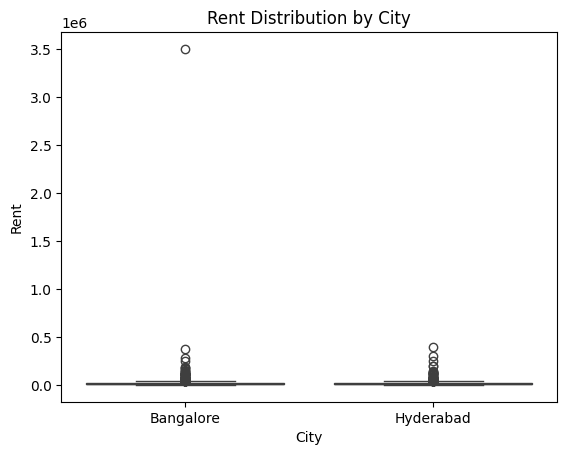

In [85]:
sns.boxplot(x='City', y='Rent', data=df[df['City'].isin([region1, region2])])
plt.title('Rent Distribution by City')
plt.show()

In [87]:
from scipy.stats import f_oneway

bng_rents = df[df['City'] == 'Bangalore']['Size']
mum_rents = df[df['City'] == 'Mumbai']['Size']
hyd_rents = df[df['City'] == 'Hyderabad']['Size']

f_stat, p_value = f_oneway(bng_rents,mum_rents,hyd_rents)


print(" One-Way ANOVA Test Results")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ At least one group mean is significantly different (Reject H0)")
else:
    print("❌ No significant difference between group means (Fail to reject H0)")


 One-Way ANOVA Test Results
F-Statistic: 45.3838
P-Value: 0.0000
✅ At least one group mean is significantly different (Reject H0)


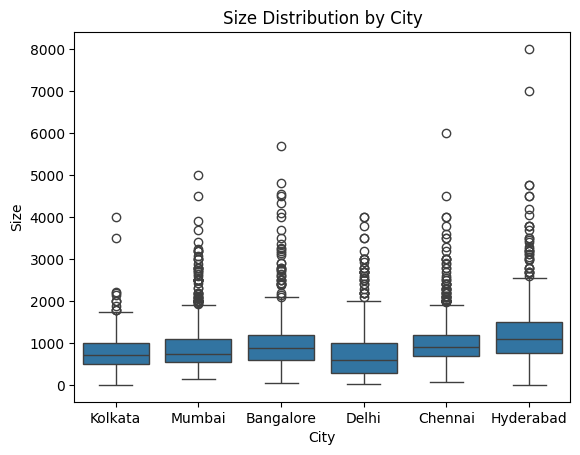

In [52]:
sns.boxplot(x='City', y='Size', data=df)
plt.title('Size Distribution by City')
plt.show()

In [90]:
from scipy.stats import chi2_contingency

print("Contingency Table:")
cols = ['Rent','BHK']
data = df[cols]
print(data)

chi2, p, dof, expected = chi2_contingency(data)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)
if p < 0.05:
    print("✅ There is a significant relationship (Reject H0: Independent)")
else:
    print("❌ No significant relationship (Fail to reject H0)")

Contingency Table:
       Rent  BHK
0     10000    2
1     20000    2
2     17000    2
3     10000    2
4      7500    2
...     ...  ...
4741  15000    2
4742  29000    3
4743  35000    3
4744  45000    3
4745  15000    2

[4746 rows x 2 columns]

Chi-Square Test Results:
Chi-Square Statistic: 10600.4308
P-Value: 0.0000
Degrees of Freedom: 4745

Expected Frequencies:
[[1.00014044e+04 5.95583652e-01]
 [2.00008090e+04 1.19104821e+00]
 [1.70009876e+04 1.01240884e+00]
 ...
 [3.50009157e+04 2.08430460e+00]
 [4.50003202e+04 2.67976915e+00]
 [1.50011067e+04 8.93315931e-01]]
✅ There is a significant relationship (Reject H0: Independent)


In [92]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(df['BHK'], df['Rent'])

# 📌 Output results
print("📌 Pearson Correlation Test Results")
print(f"Correlation Coefficient (r): {corr_coef:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Significant linear relationship (Reject H0)")
else:
    print("❌ No significant linear relationship (Fail to reject H0)")


📌 Pearson Correlation Test Results
Correlation Coefficient (r): 0.3697
P-Value: 0.0000
✅ Significant linear relationship (Reject H0)


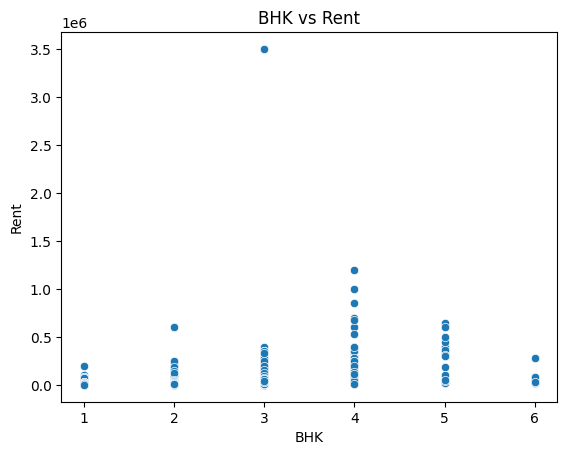

In [94]:
sns.scatterplot(x='BHK', y='Rent', data=df)
plt.title('BHK vs Rent')
plt.show()